In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


plt.rcParams["figure.figsize"] = (10, 6) 
import warnings
warnings.filterwarnings('ignore') 

# Read Data

In [2]:
df = pd.read_csv("co2.csv")
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [3]:
df.shape

(7385, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

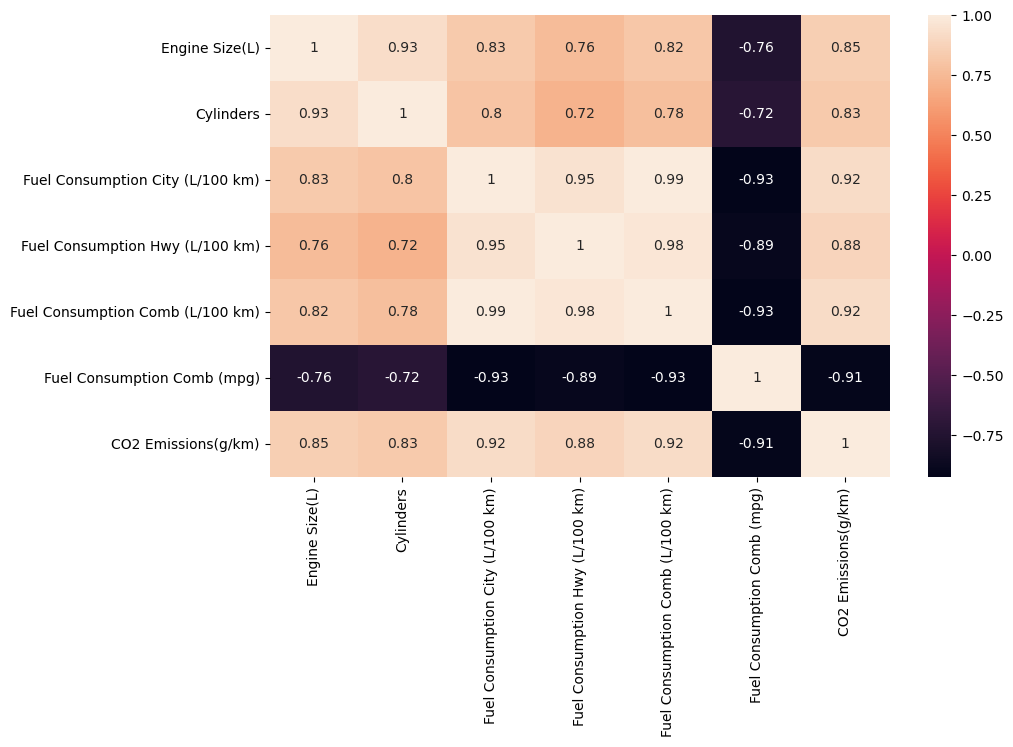

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [9]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

In [10]:
pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

# Simple Linear Regression

In [11]:
df1 = df[["Engine Size(L)", "CO2 Emissions(g/km)"]]
df1.head()

Engine Size(L)  CO2 Emissions(g/km)
0             2.0                  196
1             2.4                  221
2             1.5                  136
3             3.5                  255
4             3.5                  244

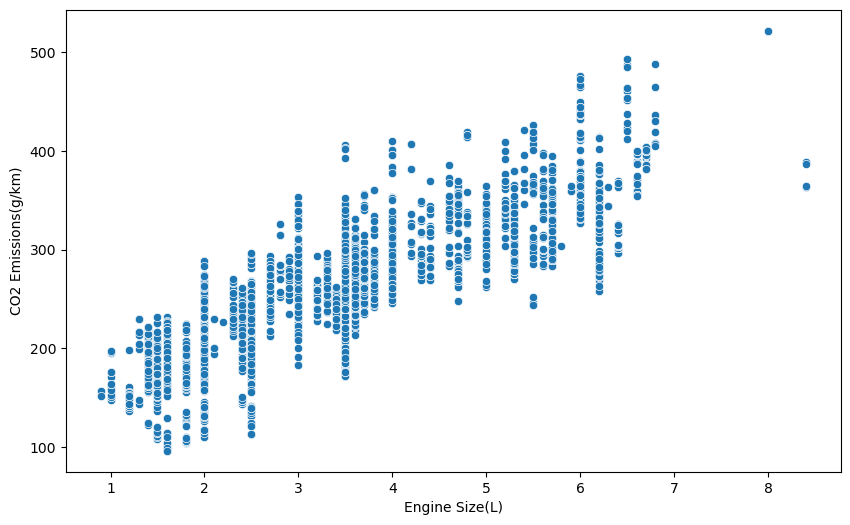

In [12]:
sns.scatterplot(data=df1, x="Engine Size(L)", y="CO2 Emissions(g/km)");

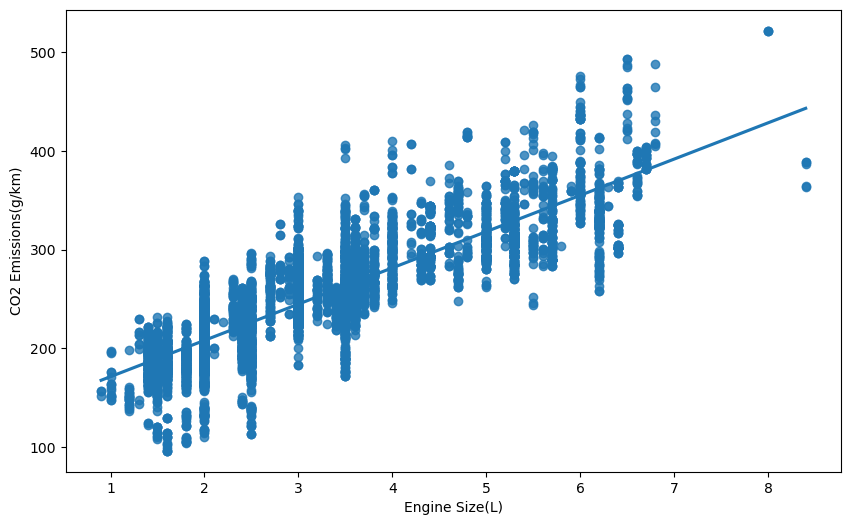

In [13]:
sns.regplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df1, ci=None);

In [14]:
X = df["Engine Size(L)"]
y = df["CO2 Emissions(g/km)"]

In [15]:
slope, intercept = np.polyfit(X, y, deg=1)

print("slope       :", slope)
print("intercept   :", intercept)

slope       : 36.77731518641939
intercept   : 134.3658927234949


In [16]:
corr = df["CO2 Emissions(g/km)"].corr(df["Engine Size(L)"])
corr

0.8511446437900009

In [17]:
R2_score = corr**2
R2_score

0.7244472046524075

In [18]:
np.polyfit(X, y, deg=1)

array([ 36.77731519, 134.36589272])

In [19]:
slope, intercept = np.polyfit(X, y, deg=1)

print("slope       :", slope)
print("intercept   :", intercept)

slope       : 36.77731518641939
intercept   : 134.3658927234949


In [20]:
b1, b0 = np.polyfit(X, y, deg=1)

print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518641939
b0 : 134.3658927234949


In [21]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine Size(L), Length: 7385, dtype: float64

In [22]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

actual   predicted   residual          LSE
0        196  207.920523 -11.920523   142.098871
1        221  222.631449  -1.631449     2.661626
2        136  189.531866 -53.531866  2865.660624
3        255  263.086496  -8.086496    65.391416
4        244  263.086496 -19.086496   364.294325
...      ...         ...        ...          ...
7380     219  207.920523  11.079477   122.754808
7381     232  207.920523  24.079477   579.821208
7382     240  207.920523  32.079477  1029.092838
7383     232  207.920523  24.079477   579.821208
7384     248  207.920523  40.079477  1606.364469

[7385 rows x 4 columns]

In [23]:
df_2.residual.sum().round()

0.0

In [24]:
df_2.LSE.sum()

6966208.685372684

In [25]:
potential_engine = np.linspace(0,10,11)
potential_engine

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [26]:
predicted_co2_lin = b1*potential_engine + b0
predicted_co2_lin

array([134.36589272, 171.14320791, 207.9205231 , 244.69783828,
       281.47515347, 318.25246866, 355.02978384, 391.80709903,
       428.58441421, 465.3617294 , 502.13904459])

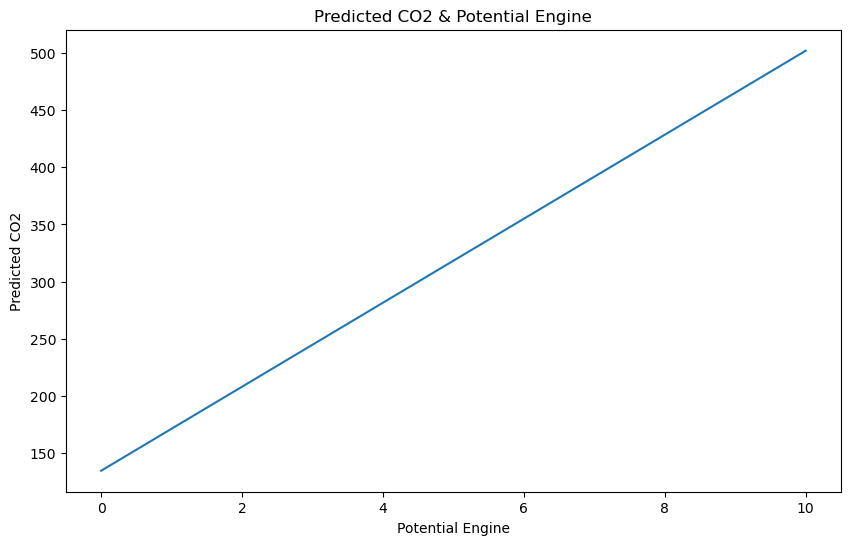

In [27]:
plt.plot(potential_engine, predicted_co2_lin)

plt.title("Predicted CO2 & Potential Engine")
plt.xlabel("Potential Engine")
plt.ylabel("Predicted CO2")
plt.show()

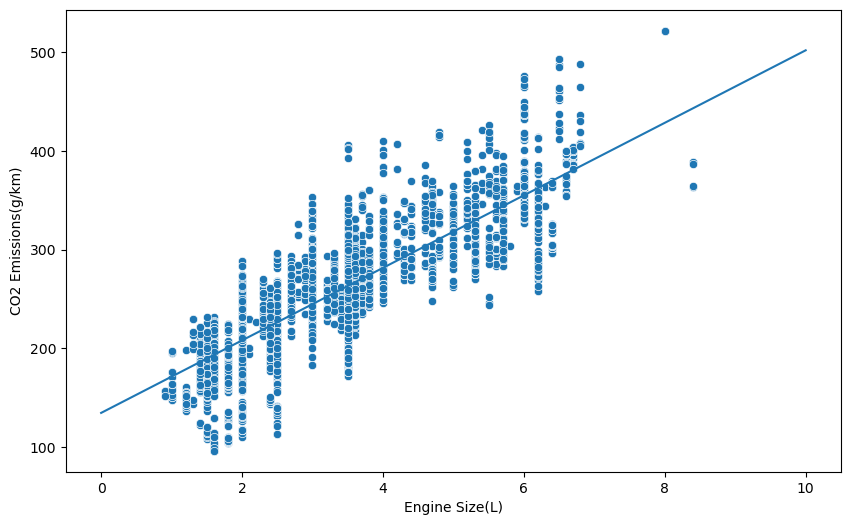

In [28]:
plt.plot(potential_engine, predicted_co2_lin)
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

In [29]:
a = np.polyfit(X, y, deg=3)
a

array([ 0.5532652 , -8.69737899, 76.04439217, 84.89105185])

In [30]:
a1 = np.polyfit(X, y, deg=3)[0]
a2 = np.polyfit(X, y, deg=3)[1]
a3 = np.polyfit(X, y, deg=3)[2]
a0 = np.polyfit(X, y, deg=3)[3]

In [31]:
predicted_co2_poly = a1*potential_engine**3 + a2*potential_engine**2 + a3*potential_engine + a0
predicted_co2_poly 

array([ 84.89105185, 152.79133023, 206.61644184, 249.6859779 ,
       285.31952962, 316.8366882 , 347.55704486, 380.80019081,
       419.88571727, 468.13321543, 528.86227652])

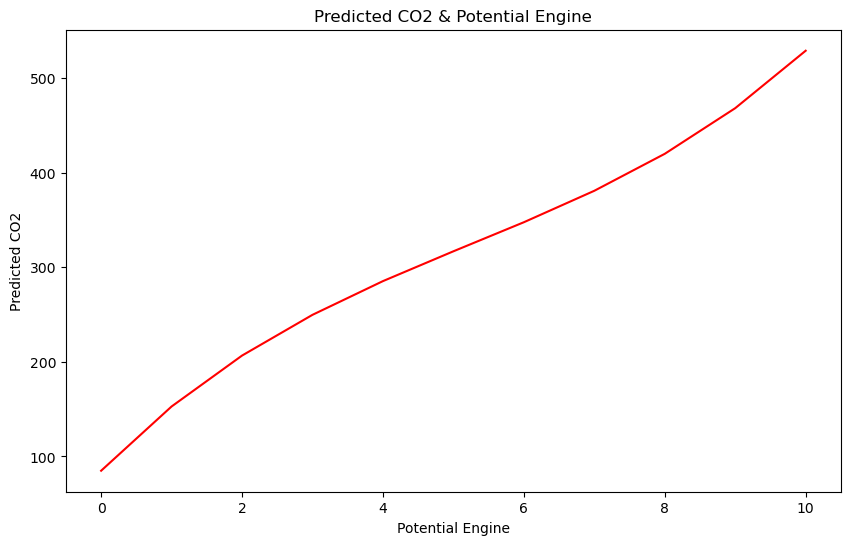

In [32]:
plt.plot(potential_engine, predicted_co2_poly, color="red")

plt.title("Predicted CO2 & Potential Engine")
plt.xlabel("Potential Engine")
plt.ylabel("Predicted CO2")
plt.show()

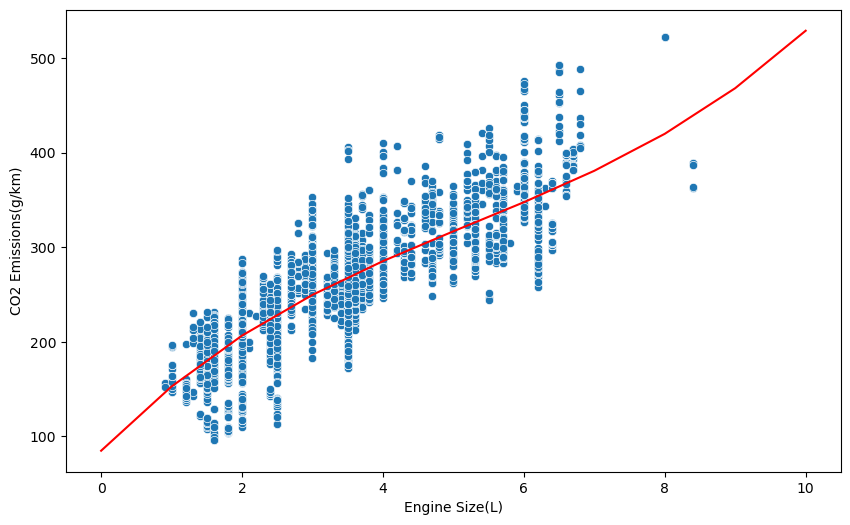

In [33]:
plt.plot(potential_engine, predicted_co2_poly, color="red")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

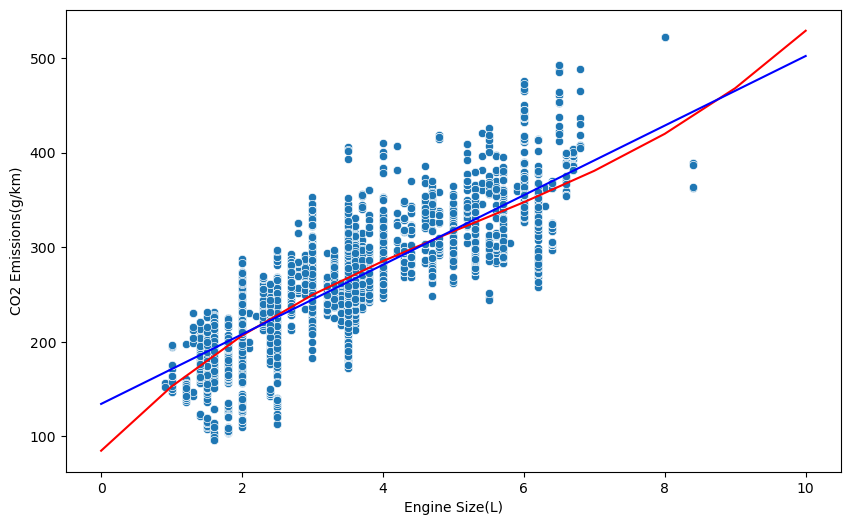

In [34]:
plt.plot(potential_engine, predicted_co2_poly, color="red")
plt.plot(potential_engine, predicted_co2_lin, color="blue")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

In [35]:
R2_score

0.7244472046524075

In [36]:
s = np.polyfit(X, y, deg=10)
s

array([-2.58821226e-03,  1.20187357e-01, -2.43202503e+00,  2.80824345e+01,
       -2.03684216e+02,  9.63599333e+02, -2.99207280e+03,  5.98239288e+03,
       -7.32608476e+03,  4.98209625e+03, -1.27036520e+03])

In [37]:
s1 = np.polyfit(X, y, deg=10)[0]
s2 = np.polyfit(X, y, deg=10)[1]
s3 = np.polyfit(X, y, deg=10)[2]
s4 = np.polyfit(X, y, deg=10)[3]
s5 = np.polyfit(X, y, deg=10)[4]
s6 = np.polyfit(X, y, deg=10)[5]
s7 = np.polyfit(X, y, deg=10)[6]
s8 = np.polyfit(X, y, deg=10)[7]
s9 = np.polyfit(X, y, deg=10)[8]
s10 = np.polyfit(X, y, deg=10)[9]
s0 = np.polyfit(X, y, deg=10)[10]

In [38]:
pred_lin = b1*X + b0
predicted_co2_poly = s1*X**10 + s2*X**9 + s3*X**8 + s4*X**7 + s5*X**6 + s6*X**5 + s7*X**4 + s8*X**3 + s9*X**2 + s10*X + s0
predicted_co2_poly 

0       205.694138
1       226.325002
2       181.493537
3       267.256741
4       267.256741
           ...    
7380    205.694138
7381    205.694138
7382    205.694138
7383    205.694138
7384    205.694138
Name: Engine Size(L), Length: 7385, dtype: float64

In [39]:
values = {"actual": y, "predicted": predicted_co2_poly, "residual": y - predicted_co2_poly, "LSE": (y - predicted_co2_poly)**2}
df_2 = pd.DataFrame(values)
df_2

actual   predicted   residual          LSE
0        196  205.694138  -9.694138    93.976309
1        221  226.325002  -5.325002    28.355647
2        136  181.493537 -45.493537  2069.661886
3        255  267.256741 -12.256741   150.227697
4        244  267.256741 -23.256741   540.875996
...      ...         ...        ...          ...
7380     219  205.694138  13.305862   177.045967
7381     232  205.694138  26.305862   691.998382
7382     240  205.694138  34.305862  1176.892176
7383     232  205.694138  26.305862   691.998382
7384     248  205.694138  42.305862  1789.785969

[7385 rows x 4 columns]

In [40]:
corr2 = df["CO2 Emissions(g/km)"].corr(predicted_co2_poly)
corr2

0.8581207649735595

In [41]:
R2_score2 = corr2**2
R2_score2

0.7363712472788069

# Multiple Linear Regression

## Polynomial Conversion

In [ ]:
poly_features.shape

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
polynomial_converter = PolynomialFeatures(degree=4, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

ValueError: Expected 2D array, got 1D array instead:
array=[2.  2.4 1.5 ... 2.  2.  2. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df.columns

In [ ]:
X = df[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']]
y = df['CO2 Emissions(g/km)']

# Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

In [ ]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

## Model Fitting

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
y_pred

In [ ]:
lr.feature_names_in_

In [ ]:
lr.coef_

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual": y_test - y_pred}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing

In [ ]:
result_sample = comparing.sample(25)
result_sample

In [ ]:
result_sample.plot(kind="bar", figsize=(15,9));

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
eval_metric(y_train, y_train_pred)

In [ ]:
residuals = y_test - y_pred

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test, y=residuals)

plt.xlabel("CO2")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--");

In [ ]:
sns.kdeplot(residuals);

In [ ]:
stats.probplot(residuals, dist="norm", plot=plt);

In [ ]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()          

In [ ]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()           